<a href="https://colab.research.google.com/github/Pratik94229/Capstone-4/blob/main/Books_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    -Unsupervised
##### **Contribution**    - Individual
##### **Name -** Pratik Thorat


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns

#For ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
working_dir='/content/drive/MyDrive/Colab Notebooks/Module 4/Capstone 4/'
books_df=pd.read_csv(working_dir+'Books.csv',low_memory=False)
ratings_df=pd.read_csv(working_dir+'Ratings.csv')
users_df=pd.read_csv(working_dir+'Users.csv')


### Dataset First View

In [4]:
# Dataset First Look
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


In [5]:
ratings_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [6]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
dict_df={'books':books_df,'ratings':ratings_df,'users':users_df}
for key in dict_df.keys():
  print(f'---------------------------------\n{key} dataframe rows and columns:\n{dict_df[key].shape}')


---------------------------------
books dataframe rows and columns:
(271360, 8)
---------------------------------
ratings dataframe rows and columns:
(1149780, 3)
---------------------------------
users dataframe rows and columns:
(278858, 3)


### Dataset Information

In [8]:
# Dataset Info
for key in dict_df.keys():
  print(f'-------------Info of {key} dataframe------------------\n\n\n{dict_df[key].info()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
-------------Info of books dataframe------------------


None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2 

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
for key in dict_df.keys():
  print(f'--------------Duplicates in {key}------------------------\n\n\n{dict_df[key][dict_df[key].duplicated()].count()}\n\n')


--------------Duplicates in books------------------------


ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64


--------------Duplicates in ratings------------------------


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


--------------Duplicates in users------------------------


User-ID     0
Location    0
Age         0
dtype: int64




#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
for key in dict_df.keys():
  print(f'---------------Missing values in {key} dataframe----------------------\n\n\n{dict_df[key].isna().sum()}\n')




---------------Missing values in books dataframe----------------------


ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

---------------Missing values in ratings dataframe----------------------


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

---------------Missing values in users dataframe----------------------


User-ID          0
Location         0
Age         110762
dtype: int64



<Axes: >

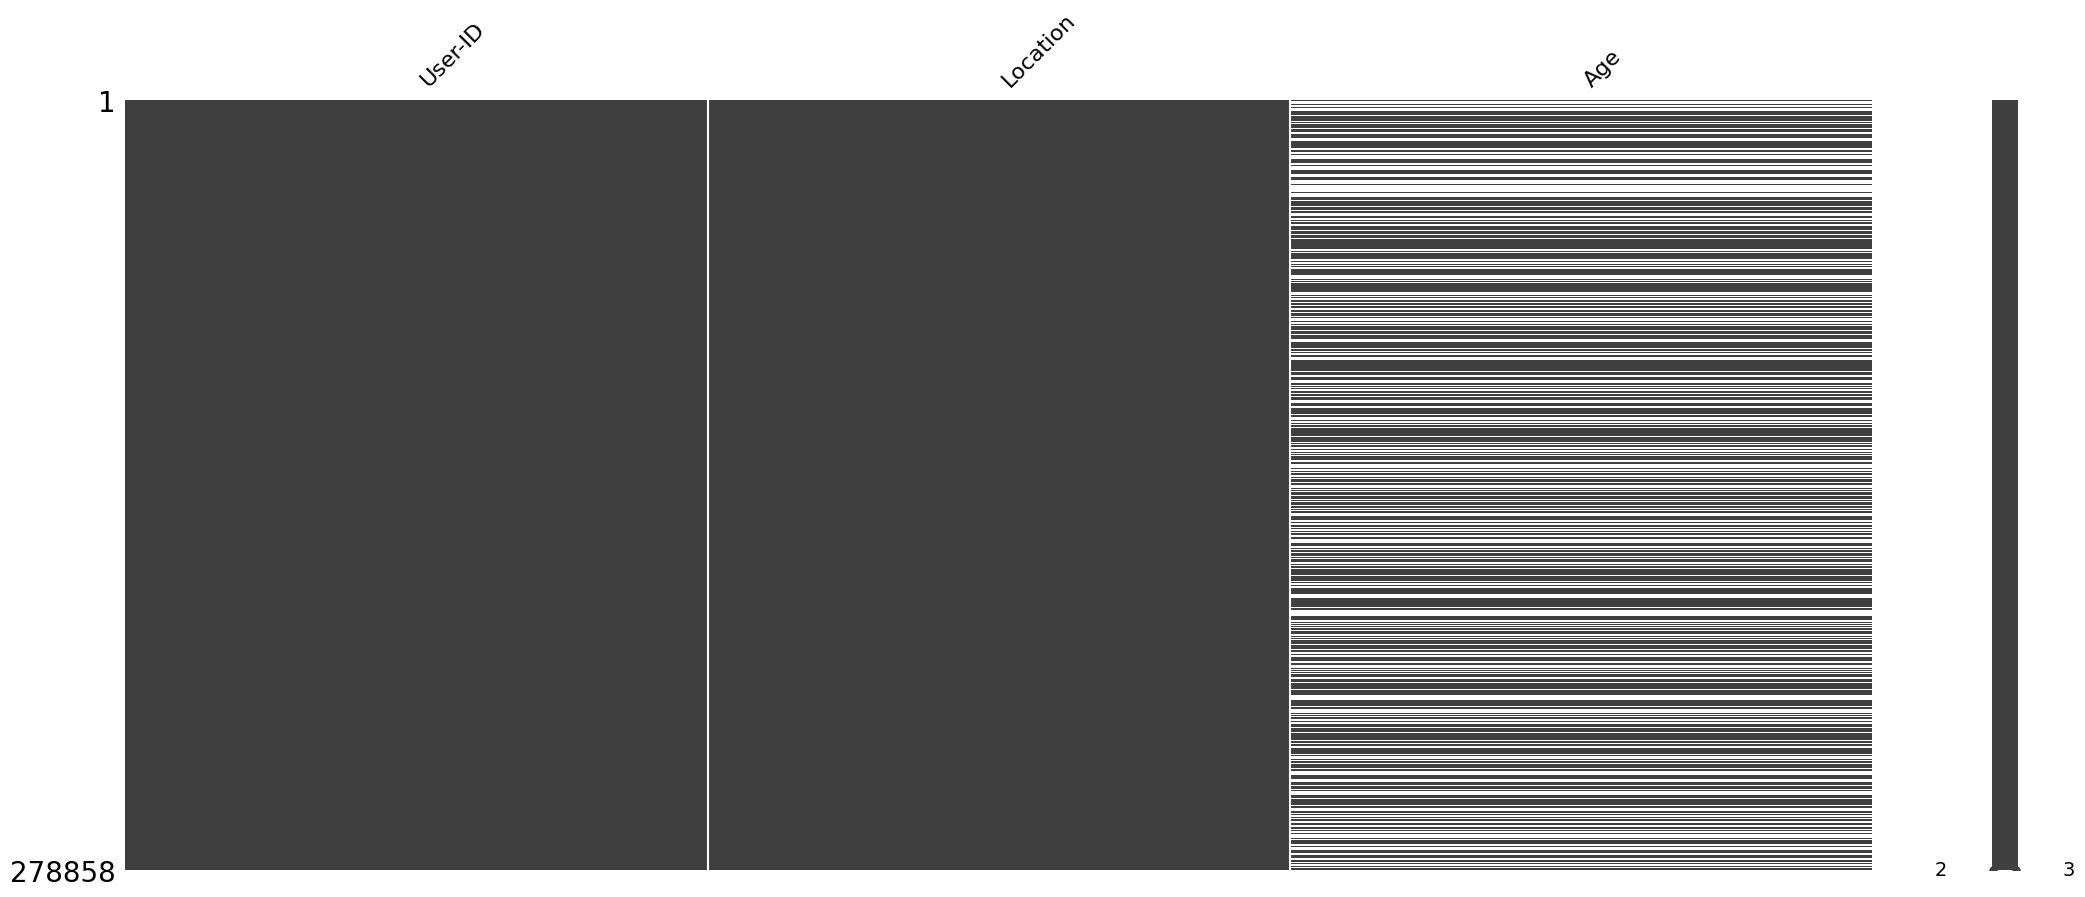

In [11]:
# Visualizing the missing values in users dataframe
msno.matrix(users_df)

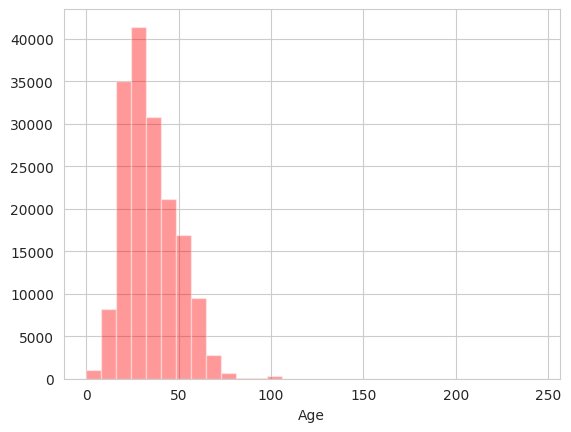

In [12]:
# set the background style of the plot
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.distplot(users_df['Age'], kde = False, color ='red', bins = 30)
plt.show()

#Checking for people whoes age is greater than 85

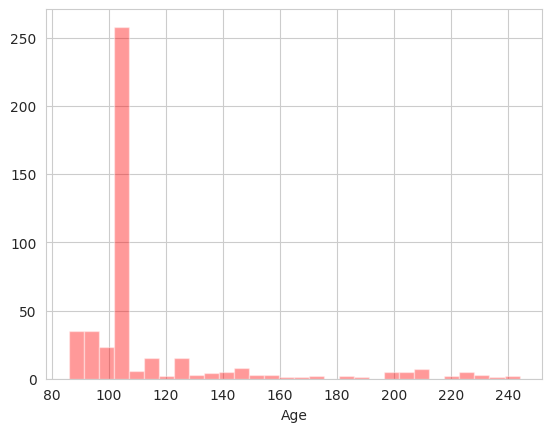

In [13]:
# set the background style of the plot
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
sns.distplot(users_df[users_df['Age']>85]['Age'], kde = False, color ='red', bins = 30)
plt.show()

#Replacing people with age greater than 85 with mean age.

In [14]:
users_df['Age'].mean()

34.75143370454978

In [15]:
users_df[users_df['Age']>85]['Age']

1288      103.0
1322      104.0
1578      231.0
3084      104.0
3210      119.0
          ...  
276352    104.0
277107    104.0
277503    103.0
277558     98.0
278301    104.0
Name: Age, Length: 452, dtype: float64

In [16]:
users_df[users_df['Age']>85]['Age']=users_df['Age'].mean()

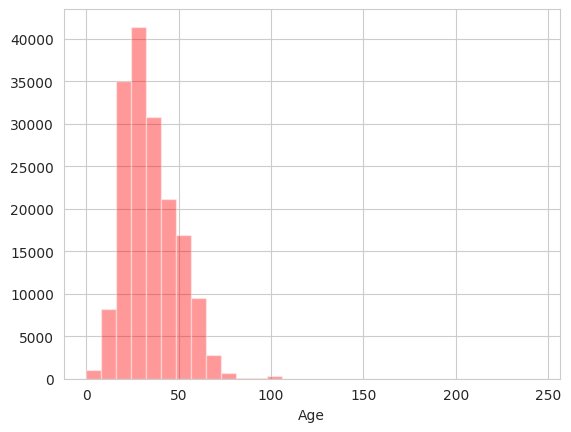

In [17]:
sns.set_style('whitegrid')
sns.distplot(users_df['Age'], kde = False, color ='red', bins = 30)
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [18]:
# Dataset 
for key in dict_df.keys():
  print(f'########################  Columns in {key} dataframe   ########################\n\n\n{dict_df[key].columns}\n\n')

########################  Columns in books dataframe   ########################


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')


########################  Columns in ratings dataframe   ########################


Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')


########################  Columns in users dataframe   ########################


Index(['User-ID', 'Location', 'Age'], dtype='object')




In [19]:
# Dataset Describe
for key in dict_df.keys():
  print(f'----------------Description of {key} dataframe-------------------------\n\n\n{dict_df[key].describe()}\n\n')

----------------Description of books dataframe-------------------------


              ISBN      Book-Title      Book-Author Year-Of-Publication  \
count       271360          271360           271359              271360   
unique      271360          242135           102023                 118   
top     0195153448  Selected Poems  Agatha Christie                2002   
freq             1              27              632               17627   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/185326119X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top   

### Variables Description 

Answer Here

### Check Unique Values for each variable.

In [20]:
# Check Unique Values for each variable.
for key in dict_df.keys():
  print(f'--------------Unique values in {key} dataframe-------------------------\n\n\n{dict_df[key].nunique()}\n\n')

--------------Unique values in books dataframe-------------------------


ISBN                   271360
Book-Title             242135
Book-Author            102023
Year-Of-Publication       118
Publisher               16807
Image-URL-S            271044
Image-URL-M            271044
Image-URL-L            271041
dtype: int64


--------------Unique values in ratings dataframe-------------------------


User-ID        105283
ISBN           340556
Book-Rating        11
dtype: int64


--------------Unique values in users dataframe-------------------------


User-ID     278858
Location     57339
Age            165
dtype: int64




## 3. ***Data Wrangling***

### Data Wrangling Code

In [21]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [22]:
# Chart - 1 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [23]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [24]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [25]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [26]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [27]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [28]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [29]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [30]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [31]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [32]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [33]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [34]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [35]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [36]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [41]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [42]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

#Popularity Based Recommendation System

In [93]:
merged_dataset= ratings_df.merge(books_df,on='ISBN')

In [94]:
merged_dataset.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [95]:
count_ratings=merged_dataset.groupby('Book-Title')['Book-Rating'].count().reset_index()

In [96]:
count_ratings.rename(columns={'Book-Rating':'count_ratings'},inplace=True)

In [97]:
count_ratings.head(3)

,Book-Title,count_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1


In [98]:
mean_rating=merged_dataset.groupby('Book-Title')['Book-Rating'].mean().reset_index()

In [99]:
mean_rating.rename(columns={'Book-Rating':'mean_ratings'},inplace=True)

In [100]:
mean_rating.head(3)

,Book-Title,mean_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00


In [101]:
book_mean_rating=pd.merge(count_ratings,mean_rating, on='Book-Title', how='inner')

In [102]:
popular_books=book_mean_rating[book_mean_rating['count_ratings']>=150].sort_values('mean_ratings',ascending=False).head(50)
popular_books

,Book-Title,count_ratings,mean_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
60582,Ender's Game (Ender Wiggins Saga (Paperback)),249,5.409639
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
189274,The Giver (21st Century Reference),179,4.916201
94259,Ishmael: An Adventure of the Mind and Spirit,162,4.907407


In [103]:
popular_books = popular_books.merge(books_df,on='Book-Title').drop_duplicates('Book-Title')
popular_books=popular_books[['Book-Title','Book-Author','Image-URL-M','count_ratings','mean_ratings']]

In [104]:
popular_books.head(3)

,Book-Title,Book-Author,Image-URL-M,count_ratings,mean_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410


### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [55]:
# Expand Contraction

#### 2. Lower Casing

In [56]:
# Lower Casing

#### 3. Removing Punctuations

In [57]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [58]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [59]:
# Remove Stopwords

In [60]:
# Remove White spaces

#### 6. Rephrase Text

In [61]:
# Rephrase Text

#### 7. Tokenization

In [62]:
# Tokenization

#### 8. Text Normalization

In [63]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [64]:
# POS Taging

#### 10. Text Vectorization

In [65]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [66]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [67]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [68]:
# Transform Your data

### 6. Data Scaling

In [69]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [70]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [71]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [72]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

<b>Neighbourhood based Collaborative filtering method

In [105]:
# Function to find the top N favorite book of a user 
def favoritebook(activeUser,N):
    #1. subset the dataframe to have the rows corresponding to the active user
    # 2. sort by the rating in descending order
    # 3. pick the top N rows
    topbooks=pd.DataFrame.sort_values(merged_dataset[merged_dataset['User-ID']==activeUser],['Book-Rating'],ascending=[0])[:N]
    # return the title corresponding to the books in topbooks 
    if(topbooks.empty):
      return "Insufficient data"
    else:  
      return list(topbooks['Book-Title'])

print(favoritebook(8,3)) # Print the top 3 favorite movies of user 8


['Goodbye to the Buttermilk Sky', 'More Cunning Than Man: A Social History of Rats and Man', 'The Witchfinder (Amos Walker Mystery Series)']


In [116]:
#Filtering users who have given atleast 200 ratings
xp_readers = merged_dataset.groupby('User-ID').count()['Book-Rating'] > 200

#Index of all the users who have given atleast 200 ratings to books
xp_readers_index = xp_readers[xp_readers].index

#Filtering all these users in dataframe
filtered_xp_users = merged_dataset[merged_dataset['User-ID'].isin(xp_readers_index)]

In [119]:
#Filtering all the books which have got atleast 50 ratings
popular_books = filtered_xp_users.groupby('Book-Title').count()['Book-Rating']>=50

#Index of all the books who have got atleast 50 ratings 
popular_books_index= popular_books[popular_books].index

#Filtering all books in dataframe
final_filtered_df = filtered_xp_users[filtered_xp_users['Book-Title'].isin(popular_books_index)]

In [128]:
#finding  the K Nearest neighbours of a user and using their ratings to predict ratings of the active user for books they haven't rated.

#Creating Pivot table
userItemRatingMatrix=pd.pivot_table(final_filtered_df, values='Book-Rating',index=['User-ID'],
                                    columns=['Book-Title'])

userItemRatingMatrix.head()

Book-Title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Day Late and a Dollar Short,A Fine Balance,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
User-ID,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


#Now each user has been represented using their ratings.

In [129]:
# function to find the similarity between 2 users using correlation

from scipy.spatial.distance import correlation 
def similarity(user1,user2):
    #normalizing user1 by the mean rating of user 1 for any book for removing biases
    user1=np.array(user1)-np.nanmean(user1)

    #normalizing user1 by the mean rating of user 2 for any book for removing biases
    user2=np.array(user2)-np.nanmean(user2)
    # Now to find the similarity between 2 users
    # We'll first subset each user to be represented only by the ratings for book the 2 users have in common 
    commonItemIds=[i for i in range(len(user1)) if user1[i]>0 and user2[i]>0]
    # Gives us book for which both users have non NaN ratings 
    if len(commonItemIds)==0:
        # If there are no book in common 
        return 0
    else:
        user1=np.array([user1[i] for i in commonItemIds])
        user2=np.array([user2[i] for i in commonItemIds])
        return correlation(user1,user2)

#Formula for predicting the rating of active user.

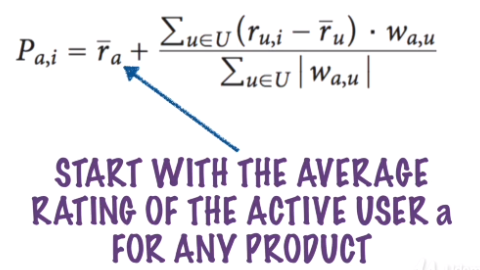

In [130]:
# Using this similarity function we will find the nearest neighbours of the active user

def nearestNeighbourRatings(activeUser,K):
    '''This function will find the K Nearest neighbours of the active user, then 
      use their ratings to predict the activeUsers ratings for other movies '''
    
    # Creating an empty matrix whose row index is userIds, and the value will be 
    # similarity of that user to the active User for finding similarity with other users.
    similarityMatrix=pd.DataFrame(index=userItemRatingMatrix.index,
                                  columns=['Similarity'])
    
    # Finding the similarity between user i and the active user and add it to the similarityMatrix
    # using similarity function.
    for i in userItemRatingMatrix.index:
        similarityMatrix.loc[i]=similarity(userItemRatingMatrix.loc[activeUser],
                                          userItemRatingMatrix.loc[i])
        
    # Sorting the similarity matrix in the descending order of similarity    
    similarityMatrix=pd.DataFrame.sort_values(similarityMatrix,
                                              ['Similarity'],ascending=False)
    
    # Finding K Nearest neighbours of the active user
    nearestNeighbours=similarityMatrix[:K]
     
    
    # Using the nearest neighbours ratings to predict the active user's rating for every books
    
    neighbourItemRatings=userItemRatingMatrix.loc[nearestNeighbours.index]
    
    # A placeholder for the predicted item ratings. 
    predictItemRating=pd.DataFrame(index=userItemRatingMatrix.columns, columns=['Rating'])

    """We will find predicted rating for active user using the above formula"""

     # for each item 
    for i in userItemRatingMatrix.columns:

        # start with the average rating of the user
        predictedRating=np.nanmean(userItemRatingMatrix.loc[activeUser])

        # for each neighbour in the neighbour list
        for j in neighbourItemRatings.index:

           ''' If the neighbour has rated that item Add the rating of the neighbour for that item
            adjusted by the average rating of the neighbour weighted by the similarity of the neighbour 
            to the active user'''

           if (userItemRatingMatrix.loc[j,i]>0):
                
                predictedRating += (userItemRatingMatrix.loc[j,i]
                                    -np.nanmean(userItemRatingMatrix.loc[j]))*nearestNeighbours.loc[j,'Similarity']
        # adding the rating to the predicted Rating matrix
        predictItemRating.loc[i,'Rating']=predictedRating
    return predictItemRating

In [210]:
# Using predicted Ratings to find the top N Recommendations for the active user 

def topNRecommendations(activeUser,N):
    # Using the 10 nearest neighbours to find the predicted ratings
    predictItemRating=nearestNeighbourRatings(activeUser,10)
    
    #removing books which are already read by active user
    booksAlreadyRead=list(userItemRatingMatrix.loc[activeUser]
                              .loc[userItemRatingMatrix.loc[activeUser]>0].index)
    
    # finding the list of items whose ratings which are not NaN
    predictItemRating=predictItemRating.drop(booksAlreadyRead)
    topRecommendations=pd.DataFrame.sort_values(predictItemRating,
                                                ['Rating'],ascending=[0])[:N]
    # This will give us the list of itemIds which are the top recommendations 
    # Let's find the corresponding book titles 

    topRecommendationTitles=(final_filtered_df.loc[final_filtered_df['Book-Title'].isin(topRecommendations.index)])
    list(set(topRecommendationTitles['Book-Title']))
    return final_filtered_df[final_filtered_df['Book-Title'].isin(list(set(topRecommendationTitles['Book-Title'])))].drop_duplicates('Book-Title')[['Book-Author','Year-Of-Publication','Publisher','Image-URL-M']].reset_index().drop(['index'],axis=1)
  

In [214]:
# Let's take this for a spin 
activeUser=3363
print(favoritebook(activeUser,5))
topNRecommendations(activeUser,5)

["Where the Heart Is (Oprah's Book Club (Paperback))", 'Joyful Noise (rpkg) : Poems for Two Voices', 'Afternoon of the Elves', 'A Pocket Full of Seeds (A Puffin Book)', 'The Gym Teacher from the Black Lagoon']


,Book-Author,Year-Of-Publication,Publisher,Image-URL-M
0,James Patterson,2002,Warner Vision,http://images.amazon.com/images/P/0446610038.0...
1,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...
2,Maeve Binchy,2000,Dell Publishing Company,http://images.amazon.com/images/P/0440235596.0...
3,George Orwell,1990,Signet Book,http://images.amazon.com/images/P/0451524934.0...
4,Anne Rice,1996,Ballantine Books,http://images.amazon.com/images/P/0345404319.0...


### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#Using Matrix Factorization

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***